# **Title:-Exploratory-Data-Analysis-on-Indian-Flight-Prices.**


# Extraction of Zip file.

In [8]:
import zipfile
import os

# File path
zip_path = 'Flight_Ticket_Participant_Datasets.zip'
extract_folder = 'Flight_Ticket_Participant_Datasets'

# Create folder and extract ZIP
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ ZIP Extraction Completed!")



✅ ZIP Extraction Completed!


# Data Loading.

In [9]:
import pandas as pd
import glob

# Find all CSV files in extracted folder
csv_files = glob.glob(extract_folder + "/*.csv")

# Read and combine into single DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

print(f"✅ Data Loaded! Combined shape: {df.shape}")
df.head()


✅ Data Loaded! Combined shape: (404, 8)


,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,"2,307"
1,AirAsia,I5 670,Mumbai,19:55,Bengaluru,21:45,01 h 50 m,"2,773"
2,AirAsia,I5 2992,Mumbai,23:55,Bengaluru,01:45\r\n+ 1 DAY,01 h 50 m,"2,773"
3,IndiGo,6E 5388,Mumbai,21:30,Bengaluru,23:15,01 h 45 m,"2,839"
4,Akasa Air,QP 1103,Mumbai,00:45,Bengaluru,02:20,01 h 35 m,"3,005"


# Data Preprocessing.

In [14]:
# Check for null values
print("\nNull values per column:")
print(df.isnull().sum())

# Remove commas from Price column safely (if any)
df['Price'] = df['Price'].apply(lambda x: int(str(x).replace(',', '')))

# Strip whitespace from text fields
df['FlightName'] = df['FlightName'].astype(str).str.strip()
df['DepartingCity'] = df['DepartingCity'].astype(str).str.strip()
df['ArrivingCity'] = df['ArrivingCity'].astype(str).str.strip()

print("✅ Data Preprocessing Done")
df.head()



Null values per column:
FlightName       0
FlightCode       0
DepartingCity    0
DepartingTime    0
ArrivingCity     0
ArrivingTime     0
Duration         0
Price            0
dtype: int64
✅ Data Preprocessing Done


,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,2307
1,AirAsia,I5 670,Mumbai,19:55,Bengaluru,21:45,01 h 50 m,2773
2,AirAsia,I5 2992,Mumbai,23:55,Bengaluru,01:45\r\n+ 1 DAY,01 h 50 m,2773
3,IndiGo,6E 5388,Mumbai,21:30,Bengaluru,23:15,01 h 45 m,2839
4,Akasa Air,QP 1103,Mumbai,00:45,Bengaluru,02:20,01 h 35 m,3005


# Feature Engineering.

In [18]:
# Create 'Route' column
df['Route'] = df['DepartingCity'] + " → " + df['ArrivingCity']

# Convert 'DepartingTime' to datetime to extract hour
df['DepartureHour'] = pd.to_datetime(df['DepartingTime']).dt.hour

print("✅ Feature Engineering Done")
df.head()


✅ Feature Engineering Done


C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_15488\349626817.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DepartureHour'] = pd.to_datetime(df['DepartingTime']).dt.hour


,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price,Route,DepartureHour
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,2307,Mumbai → Bengaluru,3
1,AirAsia,I5 670,Mumbai,19:55,Bengaluru,21:45,01 h 50 m,2773,Mumbai → Bengaluru,19
2,AirAsia,I5 2992,Mumbai,23:55,Bengaluru,01:45\r\n+ 1 DAY,01 h 50 m,2773,Mumbai → Bengaluru,23
3,IndiGo,6E 5388,Mumbai,21:30,Bengaluru,23:15,01 h 45 m,2839,Mumbai → Bengaluru,21
4,Akasa Air,QP 1103,Mumbai,00:45,Bengaluru,02:20,01 h 35 m,3005,Mumbai → Bengaluru,0


# Data Summary.

In [19]:
# Get unique airlines
print("\nUnique Flight Names:", df['FlightName'].nunique())

# Top airlines by frequency
print("\nTop Airlines:\n", df['FlightName'].value_counts())

# Price range
print(f"\nPrice Range: ₹{df['Price'].min()} to ₹{df['Price'].max()}")



Unique Flight Names: 6

Top Airlines:
 FlightName
IndiGo       188
Vistara       80
Air India     77
Akasa Air     30
SpiceJet      19
AirAsia       10
Name: count, dtype: int64

Price Range: ₹2307 to ₹20581


# Data Visualization

## Price Distribution

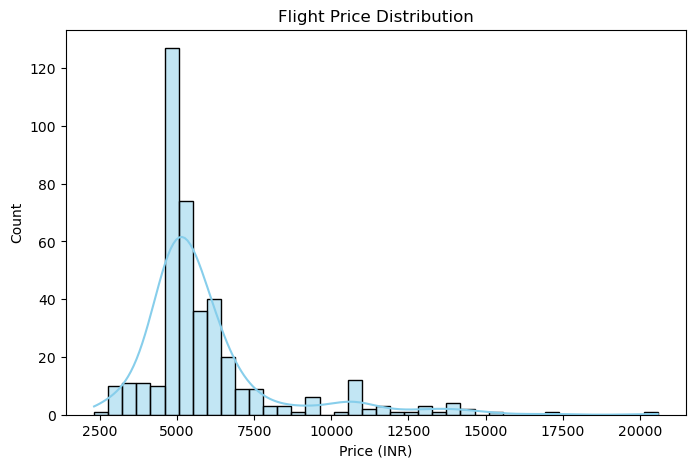

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True, color='skyblue')
plt.title("Flight Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()


## Average Price by Departing City

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_15488\2703012239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_depart_city.values, y=avg_depart_city.index, palette='viridis')


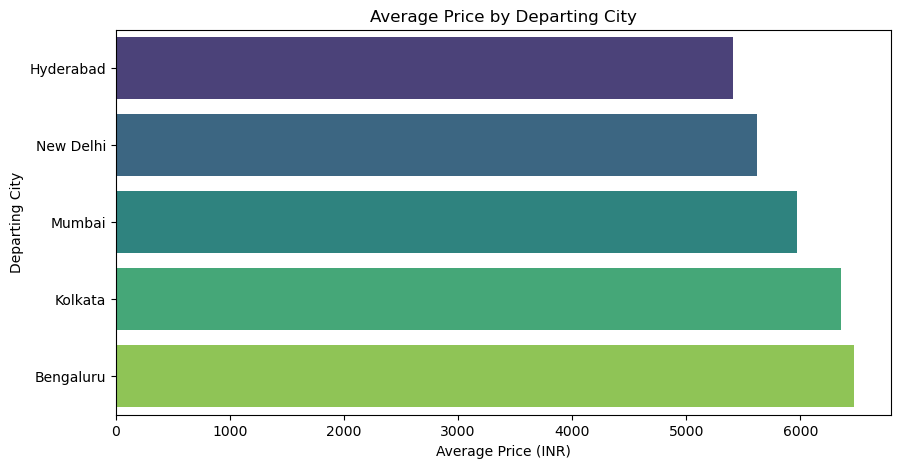

In [21]:
plt.figure(figsize=(10,5))
avg_depart_city = df.groupby('DepartingCity')['Price'].mean().sort_values()
sns.barplot(x=avg_depart_city.values, y=avg_depart_city.index, palette='viridis')
plt.title("Average Price by Departing City")
plt.xlabel("Average Price (INR)")
plt.ylabel("Departing City")
plt.show()


## Average Price by Flight Name (Airline)

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_15488\2681216239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_airline.values, y=avg_airline.index, palette='magma')


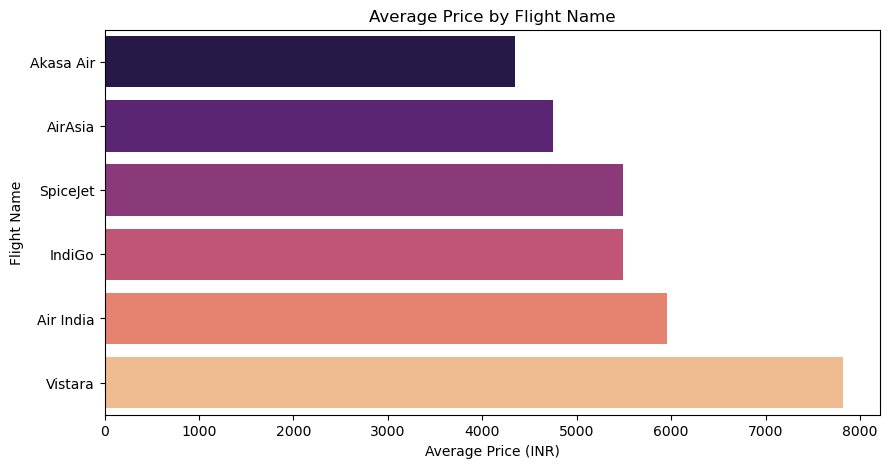

In [22]:
plt.figure(figsize=(10,5))
avg_airline = df.groupby('FlightName')['Price'].mean().sort_values()
sns.barplot(x=avg_airline.values, y=avg_airline.index, palette='magma')
plt.title("Average Price by Flight Name")
plt.xlabel("Average Price (INR)")
plt.ylabel("Flight Name")
plt.show()


## Departure Hour vs Price

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_15488\69485880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DepartureHour', y='Price', data=df, palette='plasma')


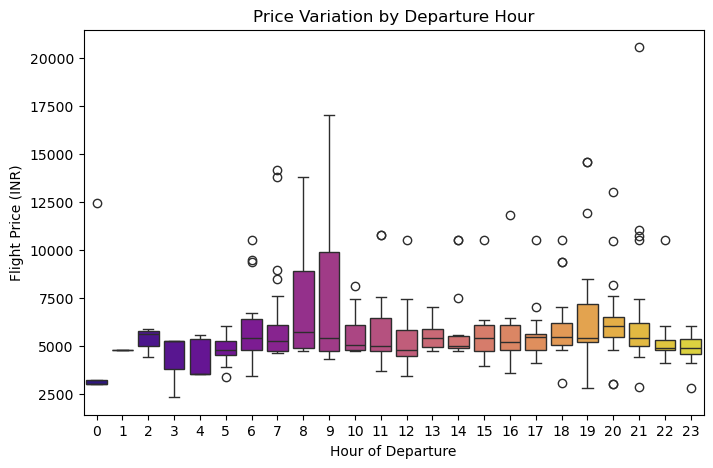

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='DepartureHour', y='Price', data=df, palette='plasma')
plt.title("Price Variation by Departure Hour")
plt.xlabel("Hour of Departure")
plt.ylabel("Flight Price (INR)")
plt.show()


## Top 10 Routes

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_15488\2883137815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette='coolwarm')


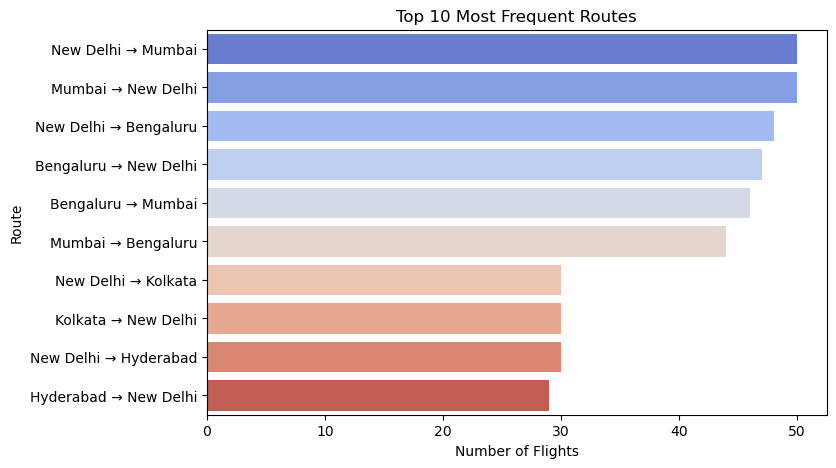

In [25]:
plt.figure(figsize=(8,5))
top_routes = df['Route'].value_counts().head(10)
sns.barplot(x=top_routes.values, y=top_routes.index, palette='coolwarm')
plt.title("Top 10 Most Frequent Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()


## Proportion of Flights by Departing City

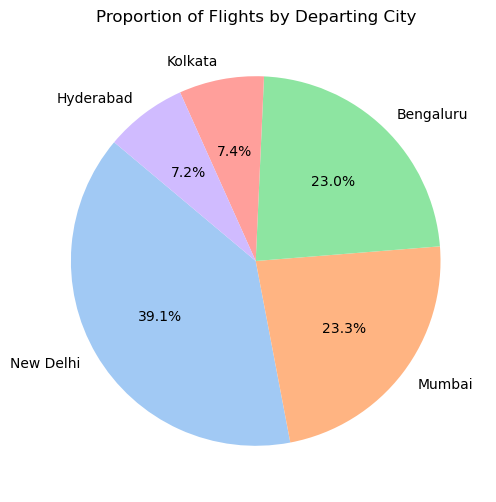

In [27]:
plt.figure(figsize=(6,6))
depart_counts = df['DepartingCity'].value_counts()
plt.pie(depart_counts.values, labels=depart_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Proportion of Flights by Departing City")
plt.show()


## Exploring Correlation Between Price & Schedule Attribute

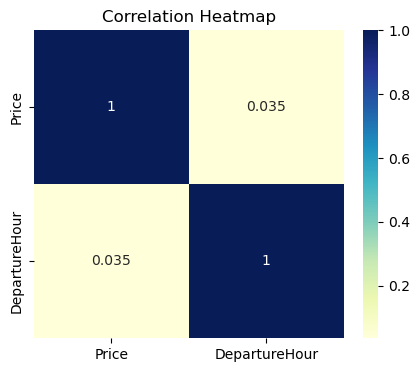

In [28]:
plt.figure(figsize=(5,4))
corr = df[['Price', 'DepartureHour']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()


## Distribution of Prices by Departure Hour

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_15488\3170378440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DepartureHour', y='Price', data=df, palette='muted')


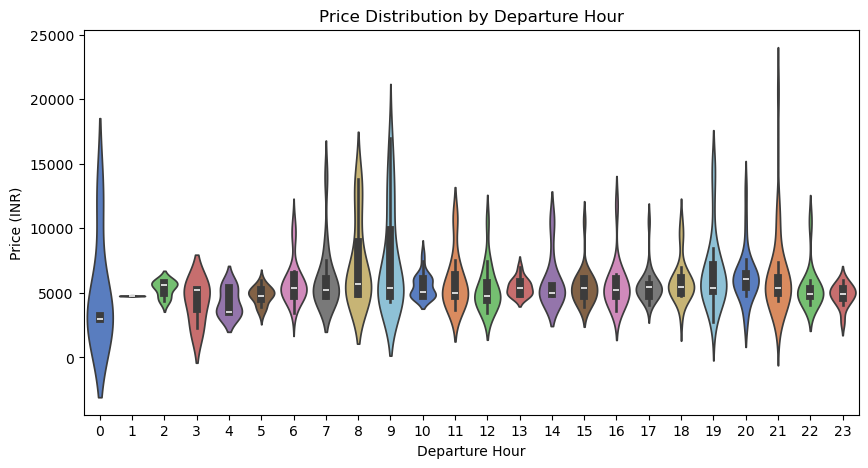

In [29]:
plt.figure(figsize=(10,5))
sns.violinplot(x='DepartureHour', y='Price', data=df, palette='muted')
plt.title("Price Distribution by Departure Hour")
plt.xlabel("Departure Hour")
plt.ylabel("Price (INR)")
plt.show()


## Flight Prices per Departing City

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_15488\1861346161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='DepartingCity', y='Price', data=df, palette='Set2')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:

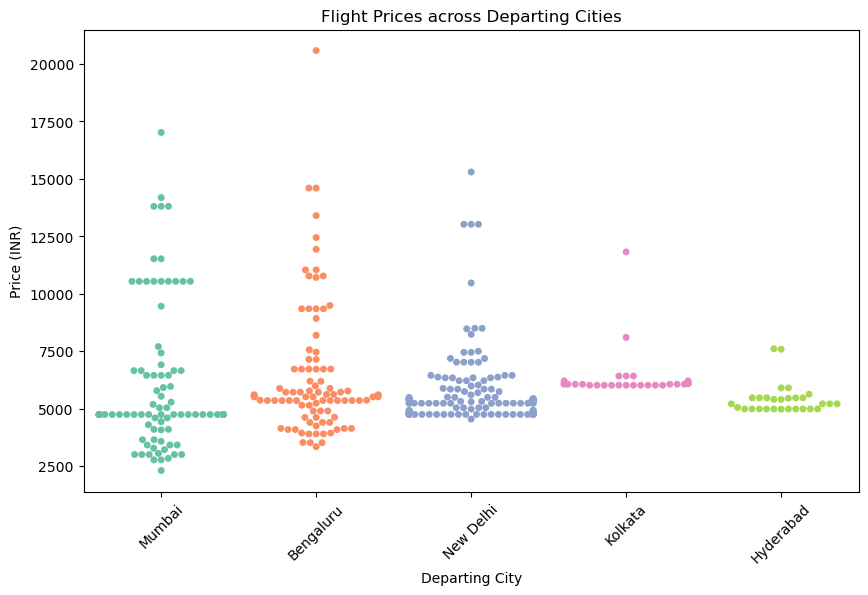

In [30]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='DepartingCity', y='Price', data=df, palette='Set2')
plt.title("Flight Prices across Departing Cities")
plt.xlabel("Departing City")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.show()


# Insights Summary

In [31]:
print("Key Insights:")
print("1️⃣ Majority of flights are concentrated in key cities like Delhi, Mumbai, and Bangalore.")
print("2️⃣ Prices are generally higher during certain hours of the day.")
print("3️⃣ Some airlines consistently show higher average prices.")
print("4️⃣ Most frequent routes involve major metro cities.")

Key Insights:
1️⃣ Majority of flights are concentrated in key cities like Delhi, Mumbai, and Bangalore.
2️⃣ Prices are generally higher during certain hours of the day.
3️⃣ Some airlines consistently show higher average prices.
4️⃣ Most frequent routes involve major metro cities.


# Save Cleaned Dataset

In [32]:
df.to_csv("Cleaned_Flight_Data.csv", index=False)
print("✅ Cleaned dataset saved successfully.")


✅ Cleaned dataset saved successfully.


# Conclusion

This project successfully performed Exploratory Data Analysis on Indian flight ticket prices. Various visualizations helped analyze price distribution, airline pricing patterns, departure city trends, and time-based price fluctuations. The analysis identified key routes, peak hours for pricing, and differences across airlines. This project can be extended further by applying machine learning models to predict flight prices based on historical data and additional features like holidays, seasons, and promotions.
